<a href="https://colab.research.google.com/github/s1250103/Public_mori-lab/blob/eras/eras/tune/programs/new_dataCleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ツール

In [1]:
def beep():
  from google.colab import output
  output.eval_js('new Audio(\
"https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg")\
.play()') 

In [2]:
import matplotlib.pyplot as plt
import cv2
def display_ndarray(image):
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()

#ディレクトリ環境設定

In [3]:
# file dealing
import os
import shutil
from google.colab import drive
# data dealing
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
# process deasing
import gc

In [4]:
import os
from os import path
from google.colab import drive

def make_dirStruct():
  # gdrive 接続
  if not path.exists('/content/drive'):
    drive.mount('/content/drive')
  else:
    print("Already confirm")
  # colab テンポラリディレクトリの作成
  desk = '/content/desk'
  if not os.path.exists(desk):
    os.mkdir(desk)
  os.chdir(desk)
  print("Created at /content/desk")
  return desk

In [5]:
desk = make_dirStruct()

Mounted at /content/drive
Created at /content/desk


In [6]:
class video_format:
  name = "video_format"
  # サンプリングされたCMデータの仕様
  playtime = "15秒"
  displaysize = "(any, any, RGB)"
  videoformat = "any"
  # モデルが扱うCMデータ(上のようなデータは、下のように変換される)
  HEIGHT = 45
  WIDTH = 80
  FRAME_SIZE = 30
  COLOR = "RGB"
  FPS = "2 (FRAME_SIZE / playtime)" # 定義ではなく上から導かれた値

In [7]:
format1 = video_format()

## [A-1-1]データ取得

In [8]:
dataPath = '/content/drive/MyDrive/new_categorize'
if not os.path.isdir(dataPath):
  print("no such data path")

get paths of each category

In [9]:
CATEGORIES = ['product', 'service', 'serviceORproduct', 'unjudgeable']

categoryPaths = []
for each in CATEGORIES:
  thePath = os.path.join(dataPath, each)
  if os.path.isdir(thePath):
    categoryPaths.append(thePath)
  else:
    print("error")
    break
  
if len(CATEGORIES) != len(categoryPaths):
  print("error: in directory struct")
  exit()

get all 

In [10]:
data_inEachCategory = []
for eachPath in categoryPaths:
  files = os.listdir(eachPath)
  if '.DS_Store' in files:
    files.remove('.DS_Store')
    print("remove DS_Store")
  else:
    print("no DS_Store")
    
  data_inEachCategory.append(files)

remove DS_Store
remove DS_Store
remove DS_Store
remove DS_Store


#データの可視化

In [11]:
nums_data = []
nums = 0
for numdata in data_inEachCategory:
  nums_data.append(len(numdata))
  nums = nums + len(numdata)

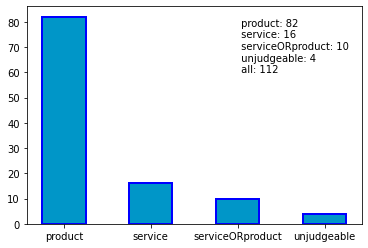

Number product:  82
Number service:  16
Number serviceORproduct:  10
Number unjudgeable:  4
-----------------------------------------------------
Number All:  112


In [12]:
import matplotlib.pyplot as plt
 
left = [1, 2, 3, 4]
height = nums_data

labels = ['product', 'service', 'serviceORproduct', 'unjudgeable']
 
plt.bar(left, height, width=0.5, color='#0096c8',
        edgecolor='b', linewidth=2, tick_label=labels)

plt.text(3, 60, 
         "\n product: 82\n service: 16\n serviceORproduct: 10\n unjudgeable: 4\n all: 112",
         size=10)

plt.savefig("img.png")
plt.show()

print("Number product: ", nums_data[0])
print("Number service: ", nums_data[1])
print("Number serviceORproduct: ", nums_data[2])
print("Number unjudgeable: ", nums_data[3])
print("-----------------------------------------------------")
print("Number All: ", nums)



#内部の変数として、適切な形にして取り込む

学習データとテストデータとで分ける

In [13]:
forTest = 2 
forLearn = nums - forTest*4

print("forTest: ", forTest)
print("forLearn: ", forLearn)

forTest:  2
forLearn:  104


In [25]:
import math
import cv2
def makeupVideo(video):
  framesize = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  cutTiming = math.floor(framesize / format1.FRAME_SIZE)
  cutTail = cutTiming * format1.FRAME_SIZE

  normalizedFrames = []
  count = 0

  # フレーム３０枚分を１つの動画から間伐する
  while count <= cutTail - 1:
    IO, frame = video.read()
    if (count % cutTiming) == 0: 
      if not IO:
        print("error") 
        break
      else: 
        fixedFrame = cv2.resize(frame, dsize=(format1.WIDTH, format1.HEIGHT))
        # display_ndarray(fixedFrame)
        # fixedFrame = fixedFrame.flatten().astype(np.float32)/255.0

        # print(fixedFrame.shape)
        normalizedFrames.append(fixedFrame)
    else:
      pass

    count += 1


  return np.array(normalizedFrames).flatten().astype(np.float32)/255.0

In [29]:
%%time
# Wall time: 9min 28s
# Wall time: 8min 12s

videoContener_test = []
labelContener_test = []
videoContener_train = []
labelContener_train = []

for index, eachPath in enumerate(categoryPaths):
  files = data_inEachCategory[index]
  test_files = files[:forTest]
  train_files = files[forTest:]
  print(eachPath, "& label =", index)
  print("=============================================")

  # test part
  print("[test part] starts")
  print("--------------")
  for f in test_files:
    theFile = os.path.join(eachPath, f)
    print("searching ", theFile)
    if os.path.isfile(theFile):
      print('@exists.')
      print("@loading from physical.")
      innnerData_video = cv2.VideoCapture(theFile)
      label = index
      innnerData_frames = makeupVideo(innnerData_video)

      videoContener_test.append(innnerData_frames)
      labelContener_test.append(label)

      print("test finish")
      print("-------------------------------------------\n")
      # break
  # /for f
  # train part 
  print("[train part] starts")
  print("--------------")
  for f in train_files:
    theFile = os.path.join(eachPath, f)
    print("searching ", theFile)
    if os.path.isfile(theFile):
      print('@exists.')
      print("@loading from physical.")
      innnerData_video = cv2.VideoCapture(theFile)
      label = index
      innnerData_frames = makeupVideo(innnerData_video)

      videoContener_train.append(innnerData_frames)
      labelContener_train.append(label)

      print("train finish")
      print("-------------------------------------------\n")
      # break
  # /for f

  # break
# /for index
beep()

/content/drive/MyDrive/new_categorize/product & label = 0
[test part] starts
--------------
searching  /content/drive/MyDrive/new_categorize/product/unicharm_シルコット.mp4
@exists.
@loading from physical.
test finish
-------------------------------------------

searching  /content/drive/MyDrive/new_categorize/product/UHA味覚糖_ぷっちょ とろけるグミ.mp4
@exists.
@loading from physical.
test finish
-------------------------------------------

[train part] starts
--------------
searching  /content/drive/MyDrive/new_categorize/product/ニトリ_わんぱく組.mp4
@exists.
@loading from physical.
train finish
-------------------------------------------

searching  /content/drive/MyDrive/new_categorize/product/meiji_Poifull.mp4
@exists.
@loading from physical.
train finish
-------------------------------------------

searching  /content/drive/MyDrive/new_categorize/product/小林製薬_生理用品_サラサーティ 天然コットン100%.mp4
@exists.
@loading from physical.
train finish
-------------------------------------------

searching  /content/drive/

Wall time: 32min 8s
Wall time: 18min 1s

チェック

In [30]:
print(len(videoContener_test))
print(len(labelContener_test))

print(len(videoContener_train))
print(len(labelContener_train))

8
8
104
104


In [31]:
videoContener_test[0].shape

(324000,)

# パッキング

In [32]:
def save_data(npdata, saveName):
  np.savez(os.path.join(desk, saveName), *npdata)


In [33]:
save_data(np.array(videoContener_test), "normalTestVideos")
save_data(np.array(labelContener_test), "normalTestLabels")

save_data(np.array(videoContener_train), "normalTrainVideos")
save_data(np.array(labelContener_train), "normalTrainLabels")

#ストレージに保存

In [34]:
import shutil

shelf = '/content/drive/MyDrive/colab'
book = 'data0110'
shelf_book = os.path.join(shelf, book)
if not os.path.exists(shelf_book):
  os.mkdir(shelf_book)



In [35]:
wants_paths = [
"/content/desk/normalTrainLabels.npz",
"/content/desk/normalTrainVideos.npz",
"/content/desk/normalTestLabels.npz",
"/content/desk/normalTestVideos.npz",
"/content/desk/img.png"
]

for want in wants_paths:
  shutil.copy2(
      want,
      shelf_book
  )